In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
data = pd.read_csv("climate.csv")
data.head()

,TimeID,TimeEST,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.Direction,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC
0,1,0:51:00,5.6,-3.9,51,1017.9,16.1,Variable,7.4,0.0,0.0,NaN,Overcast,0,2016/1/1 5:51
1,2,1:51:00,5.0,-3.9,53,1017.8,16.1,Variable,5.6,0.0,0.0,NaN,Overcast,0,2016/1/1 6:51
2,3,2:51:00,5.0,-3.3,55,1017.7,16.1,West,7.4,0.0,0.0,NaN,Overcast,280,2016/1/1 7:51
3,4,3:51:00,5.0,-3.3,55,1017.7,16.1,West,14.8,0.0,0.0,NaN,Overcast,280,2016/1/1 8:51
4,5,4:51:00,4.4,-3.3,58,1017.0,16.1,West,16.7,25.9,0.0,NaN,Overcast,270,2016/1/1 9:51


In [3]:
data.isnull().sum()

TimeID                      0
TimeEST                     0
TemperatureC                0
Dew.PointC                  0
Humidity                    0
Sea.Level.PressurehPa       0
VisibilityKm                0
Wind.Direction              0
Wind.SpeedKm.h              0
Gust.SpeedKm.h              0
Precipitationmm             0
Events                   4136
Conditions                  0
WindDirDegrees              0
DateUTC                     0
dtype: int64

In [4]:
data['Events']=data['Events'].fillna('Normal')

In [5]:
data['Events']

0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
6       Normal
7       Normal
8       Normal
9       Normal
10      Normal
11      Normal
12      Normal
13      Normal
14      Normal
15      Normal
16      Normal
17      Normal
18      Normal
19      Normal
20      Normal
21      Normal
22      Normal
23      Normal
24      Normal
25      Normal
26      Normal
27      Normal
28      Normal
29      Normal
         ...  
4522    Normal
4523    Normal
4524    Normal
4525    Normal
4526    Normal
4527    Normal
4528    Normal
4529    Normal
4530    Normal
4531    Normal
4532    Normal
4533    Normal
4534    Normal
4535    Normal
4536    Normal
4537    Normal
4538    Normal
4539    Normal
4540    Normal
4541    Normal
4542    Normal
4543    Normal
4544    Normal
4545    Normal
4546    Normal
4547    Normal
4548    Normal
4549    Normal
4550    Normal
4551    Normal
Name: Events, Length: 4552, dtype: object

In [6]:
(data['Wind.SpeedKm.h'] == 0).sum()

907

In [7]:
data['Wind.SpeedKm.h'].loc[data['Wind.SpeedKm.h'] == 0]

6       0.0
15      0.0
21      0.0
30      0.0
42      0.0
45      0.0
48      0.0
51      0.0
57      0.0
60      0.0
84      0.0
90      0.0
98      0.0
101     0.0
107     0.0
108     0.0
109     0.0
110     0.0
111     0.0
114     0.0
117     0.0
118     0.0
120     0.0
122     0.0
123     0.0
127     0.0
128     0.0
139     0.0
142     0.0
143     0.0
       ... 
4491    0.0
4493    0.0
4497    0.0
4498    0.0
4501    0.0
4504    0.0
4505    0.0
4506    0.0
4507    0.0
4508    0.0
4509    0.0
4510    0.0
4511    0.0
4513    0.0
4514    0.0
4516    0.0
4523    0.0
4526    0.0
4527    0.0
4528    0.0
4529    0.0
4532    0.0
4537    0.0
4538    0.0
4539    0.0
4540    0.0
4541    0.0
4542    0.0
4544    0.0
4549    0.0
Name: Wind.SpeedKm.h, Length: 907, dtype: float64

In [8]:
data.replace([0],data['Wind.SpeedKm.h'].mean())

,TimeID,TimeEST,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.Direction,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC
0,1,0:51:00,5.6,-3.9,51,1017.9,16.1,Variable,7.400000,9.359776,9.359776,Normal,Overcast,9.359776,2016/1/1 5:51
1,2,1:51:00,5.0,-3.9,53,1017.8,16.1,Variable,5.600000,9.359776,9.359776,Normal,Overcast,9.359776,2016/1/1 6:51
2,3,2:51:00,5.0,-3.3,55,1017.7,16.1,West,7.400000,9.359776,9.359776,Normal,Overcast,280.000000,2016/1/1 7:51
3,4,3:51:00,5.0,-3.3,55,1017.7,16.1,West,14.800000,9.359776,9.359776,Normal,Overcast,280.000000,2016/1/1 8:51
4,5,4:51:00,4.4,-3.3,58,1017.0,16.1,West,16.700000,25.900000,9.359776,Normal,Overcast,270.000000,2016/1/1 9:51
5,6,5:51:00,4.4,-3.3,58,1017.5,16.1,WNW,11.100000,9.359776,9.359776,Normal,Overcast,290.000000,2016/1/1 10:51
6,7,6:51:00,3.9,-3.3,60,1017.7,16.1,Calm,9.359776,9.359776,9.359776,Normal,Overcast,9.359776,2016/1/1 11:51
7,8,7:51:00,3.9,-3.9,57,1017.6,16.1,West,11.100000,9.359776,9.359776,Normal,Overcast,280.000000,2016/1/1 12:51
8,9,8:51:00,3.9,-4.4,55,1018.0,16.1,West,11.100000,9.359776,9.359776,Normal,Partly Cloudy,260.000000,2016/1/1 13:51
9,10,9:51:00,4.4,-3.9,55,1018.0,16.1,WNW,7.400000,9.359776,9.359776,Normal,Overcast,290.000000,2016/1/1 14:51


In [9]:
data.describe()

,TimeID,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,WindDirDegrees
count,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000,4552.000000
mean,2276.500000,10.128603,0.771331,55.870167,1010.765883,14.187544,9.359776,8.676801,0.005696,90.935852
std,1314.193542,9.123422,9.720731,19.724973,67.713504,3.736171,7.160147,15.755969,0.030913,118.479910
min,1.000000,-18.300000,-28.300000,9.000000,-1.000000,1.200000,0.000000,0.000000,0.000000,0.000000
25%,1138.750000,3.300000,-6.100000,41.000000,1009.700000,14.500000,5.600000,0.000000,0.000000,0.000000
50%,2276.500000,10.000000,1.000000,53.000000,1015.600000,16.100000,9.300000,0.000000,0.000000,10.000000
75%,3414.250000,17.200000,8.300000,71.000000,1020.600000,16.100000,13.000000,0.000000,0.000000,190.000000
max,4552.000000,32.200000,20.600000,97.000000,1036.800000,16.100000,137.000000,72.200000,0.730000,360.000000


In [15]:
(data['Sea.Level.PressurehPa'] < 0).sum()

20

In [16]:
data.loc[data['Sea.Level.PressurehPa'] < 0]

,TimeID,TimeEST,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.Direction,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC
167,168,23:51:00,4.0,-8.0,42,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 4:51
168,169,0:51:00,3.0,-6.0,52,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 5:51
169,170,1:51:00,3.0,-6.0,52,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 6:51
170,171,2:51:00,3.0,-6.0,52,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 7:51
171,172,3:51:00,2.0,-7.0,52,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 8:51
172,173,4:51:00,2.0,-8.0,48,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 9:51
173,174,5:51:00,2.0,-8.0,48,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 10:51
174,175,6:51:00,2.0,-6.0,56,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 11:51
175,176,7:51:00,3.0,-4.0,60,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 12:51
176,177,9:51:00,4.0,-1.0,70,-1.0,12.0,North,0.0,0.0,0.0,Normal,Unknown,0,2016/1/8 14:51


In [17]:
data['Sea.Level.PressurehPa'].loc[data['Sea.Level.PressurehPa'] < 0]

167    -1.0
168    -1.0
169    -1.0
170    -1.0
171    -1.0
172    -1.0
173    -1.0
174    -1.0
175    -1.0
176    -1.0
177    -1.0
178    -1.0
179    -1.0
180    -1.0
3502   -1.0
3503   -1.0
3504   -1.0
3505   -1.0
3506   -1.0
3513   -1.0
Name: Sea.Level.PressurehPa, dtype: float64

In [18]:
data['Sea.Level.PressurehPa'].mean()

1010.7658831282962

In [19]:
data.head()

,TimeID,TimeEST,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.Direction,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC
0,1,0:51:00,5.6,-3.9,51,1017.9,16.1,Variable,7.4,0.0,0.0,Normal,Overcast,0,2016/1/1 5:51
1,2,1:51:00,5.0,-3.9,53,1017.8,16.1,Variable,5.6,0.0,0.0,Normal,Overcast,0,2016/1/1 6:51
2,3,2:51:00,5.0,-3.3,55,1017.7,16.1,West,7.4,0.0,0.0,Normal,Overcast,280,2016/1/1 7:51
3,4,3:51:00,5.0,-3.3,55,1017.7,16.1,West,14.8,0.0,0.0,Normal,Overcast,280,2016/1/1 8:51
4,5,4:51:00,4.4,-3.3,58,1017.0,16.1,West,16.7,25.9,0.0,Normal,Overcast,270,2016/1/1 9:51


In [20]:
data.loc[data['Sea.Level.PressurehPa'] < 0, 'Sea.Level.PressurehPa'] = data['Sea.Level.PressurehPa'].mean()

In [21]:
(data['Sea.Level.PressurehPa'] < 0).sum()

0

In [22]:
data.head()

,TimeID,TimeEST,TemperatureC,Dew.PointC,Humidity,Sea.Level.PressurehPa,VisibilityKm,Wind.Direction,Wind.SpeedKm.h,Gust.SpeedKm.h,Precipitationmm,Events,Conditions,WindDirDegrees,DateUTC
0,1,0:51:00,5.6,-3.9,51,1017.9,16.1,Variable,7.4,0.0,0.0,Normal,Overcast,0,2016/1/1 5:51
1,2,1:51:00,5.0,-3.9,53,1017.8,16.1,Variable,5.6,0.0,0.0,Normal,Overcast,0,2016/1/1 6:51
2,3,2:51:00,5.0,-3.3,55,1017.7,16.1,West,7.4,0.0,0.0,Normal,Overcast,280,2016/1/1 7:51
3,4,3:51:00,5.0,-3.3,55,1017.7,16.1,West,14.8,0.0,0.0,Normal,Overcast,280,2016/1/1 8:51
4,5,4:51:00,4.4,-3.3,58,1017.0,16.1,West,16.7,25.9,0.0,Normal,Overcast,270,2016/1/1 9:51


In [23]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4522    False
4523    False
4524    False
4525    False
4526    False
4527    False
4528    False
4529    False
4530    False
4531    False
4532    False
4533    False
4534    False
4535    False
4536    False
4537    False
4538    False
4539    False
4540    False
4541    False
4542    False
4543    False
4544    False
4545    False
4546    False
4547    False
4548    False
4549    False
4550    False
4551    False
Length: 4552, dtype: bool

In [24]:
data.isnull().sum()

TimeID                   0
TimeEST                  0
TemperatureC             0
Dew.PointC               0
Humidity                 0
Sea.Level.PressurehPa    0
VisibilityKm             0
Wind.Direction           0
Wind.SpeedKm.h           0
Gust.SpeedKm.h           0
Precipitationmm          0
Events                   0
Conditions               0
WindDirDegrees           0
DateUTC                  0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 15 columns):
TimeID                   4552 non-null int64
TimeEST                  4552 non-null object
TemperatureC             4552 non-null float64
Dew.PointC               4552 non-null float64
Humidity                 4552 non-null int64
Sea.Level.PressurehPa    4552 non-null float64
VisibilityKm             4552 non-null float64
Wind.Direction           4552 non-null object
Wind.SpeedKm.h           4552 non-null float64
Gust.SpeedKm.h           4552 non-null float64
Precipitationmm          4552 non-null float64
Events                   4552 non-null object
Conditions               4552 non-null object
WindDirDegrees           4552 non-null int64
DateUTC                  4552 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 533.5+ KB


In [28]:
data['Events'].value_counts()

Normal      4136
Rain         272
Snow         102
Fog-Snow      39
Fog-Rain       2
Fog            1
Name: Events, dtype: int64

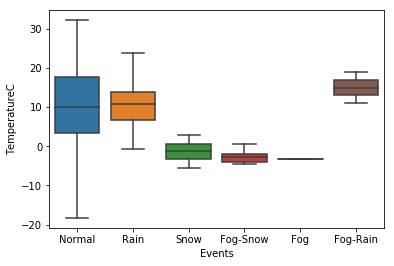

In [29]:
sns.boxplot(x="Events", y="TemperatureC", data=data);

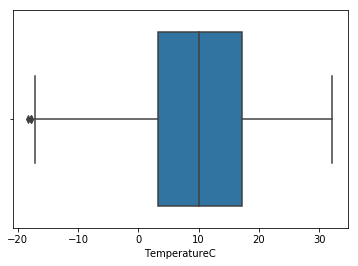

In [30]:
sns.boxplot(x=data["TemperatureC"])

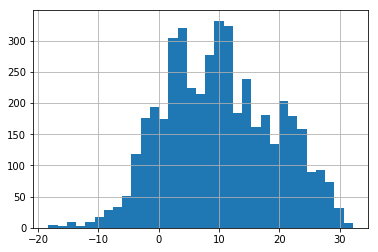

In [31]:
data['TemperatureC'].hist(bins=33)

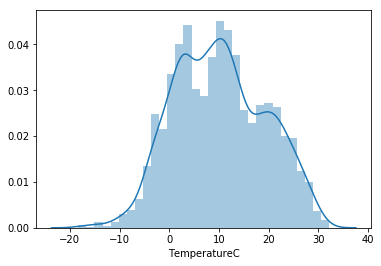

In [33]:
sns.distplot(data['TemperatureC'])

In [34]:
data = pd.DataFrame(data)
data.to_csv('newclimate.csv',index = False, header =("TimeID","TimeEST","TemperatureC","Dew.PointC","Humidity","Sea.Level.PressurehPa","VisibilityKm","Wind.Direction","Wind.SpeedKm.h","Gust.SpeedKm.h","Precipitationmm","Events","Conditions","WindDirDegrees","DateUTC"))
print(data)

      TimeID   TimeEST  TemperatureC  Dew.PointC  Humidity  \
0          1   0:51:00           5.6        -3.9        51   
1          2   1:51:00           5.0        -3.9        53   
2          3   2:51:00           5.0        -3.3        55   
3          4   3:51:00           5.0        -3.3        55   
4          5   4:51:00           4.4        -3.3        58   
5          6   5:51:00           4.4        -3.3        58   
6          7   6:51:00           3.9        -3.3        60   
7          8   7:51:00           3.9        -3.9        57   
8          9   8:51:00           3.9        -4.4        55   
9         10   9:51:00           4.4        -3.9        55   
10        11  10:51:00           4.4        -4.4        53   
11        12  11:51:00           4.4        -5.0        51   
12        13  12:51:00           4.4        -5.0        51   
13        14  13:51:00           4.4        -5.0        51   
14        15  14:51:00           3.9        -6.1        49   
15      

In [1]:
import csv  
import pymysql

In [2]:
connect = pymysql.connect(    #连接数据库服务器  
    user="root",  
    password="123",  
    host="127.0.0.1",  
    port=3306,  
    db="wendi_database",  
    charset="utf8"  
    )  
conn = connect.cursor()        #创建操作游标  
#你需要一个游标 来实现对数据库的操作相当于一条线索  
  
#                          创建表  
# conn.execute("drop database if exists wendi_database")   #如果new_database数据库存在则删除  
# conn.execute("create database wendi_database")   #新创建一个数据库  
# conn.execute("use wendi_database")         #选择new_database这个数据库  
# sql 中的内容为创建一个名为new_table的表  
sql = """create table wendi1(TimeID INT,TemperatureC Float, DewPointC Float,Humidity INT)"""  #()中的参数可以自行设置  
conn.execute("drop table if exists wendi1") # 如果表存在则删除  
conn.execute(sql)   # 创建表  

  
#                           删除  
# conn.execute("drop table new_table")  
  
conn.close()           #   关闭游标连接  
connect.close()        #   关闭数据库服务器连接 释放内存  

In [3]:
import csv  
import pymysql  
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',passwd='123',db='wendi_database',charset='utf8')  
print(conn)  
cur = conn.cursor()  
print(cur)  
with open('cli1.csv') as csvfile:  
    sp = csv.DictReader(csvfile)  
    for row in sp:
        sql = 'insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (%d,%f,%f,%d)' %(int(row['TimeID']),float(row['TemperatureC']),float(row['DewPointC']),int(row['Humidity']))  
        print(sql)  
        cur.execute(sql)  
conn.commit()   
cur.close()  

insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1,5.600000,-3.900000,51)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2,5.000000,-3.900000,53)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (3,5.000000,-3.300000,55)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4,5.000000,-3.300000,55)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (5,4.400000,-3.300000,58)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (6,4.400000,-3.300000,58)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (7,3.900000,-3.300000,60)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (8,3.900000,-3.900000,57)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (9,3.900000,-4.400000,55)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (10,4.400000,-3.900000,55)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (11,4.400000,

insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (535,1.100000,-9.400000,46)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (536,0.600000,-9.400000,48)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (537,0.600000,-8.900000,50)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (538,0.000000,-9.400000,50)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (539,-0.600000,-9.400000,52)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (540,-0.600000,-9.400000,52)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (541,-1.100000,-10.000000,51)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (542,-1.100000,-10.000000,51)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (543,-1.700000,-10.600000,51)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (544,-2.200000,-10.600000,53)
insert into wendi1(TimeID,TemperatureC,DewPointC,H

insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1604,12.200000,11.100000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1605,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1606,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1607,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1608,12.200000,11.100000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1609,12.200000,11.100000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1610,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1611,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1612,13.000000,12.000000,94)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (1613,12.800000,11.700000,93)
insert into wendi1(TimeID,TemperatureC,D

insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2870,10.600000,0.000000,48)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2871,9.400000,1.700000,59)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2872,8.900000,1.700000,61)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2873,8.300000,1.700000,63)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2874,8.300000,1.100000,61)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2875,8.300000,2.200000,66)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2876,8.300000,2.200000,66)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2877,7.200000,2.200000,71)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2878,7.800000,2.200000,68)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (2879,7.200000,2.200000,71)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) 

insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4161,25.600000,6.700000,30)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4162,25.600000,5.600000,28)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4163,25.000000,7.200000,32)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4164,24.400000,6.700000,32)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4165,23.900000,6.700000,33)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4166,23.300000,7.200000,35)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4167,21.700000,7.200000,39)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4168,21.100000,7.800000,42)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4169,19.400000,8.300000,49)
insert into wendi1(TimeID,TemperatureC,DewPointC,Humidity) values (4170,19.400000,7.800000,47)
insert into wendi1(TimeID,TemperatureC,DewPointC,H

In [2]:
import pymysql
connect = pymysql.connect(     
    user="root",  
    password="123",  
    host="127.0.0.1",  
    port=3306,  
    db="wendi_database",  
    charset="utf8"  
    )  
conn = connect.cursor() 

In [8]:
sql = 'SELECT wendi1.TemperatureC FROM wendi1 \
INNER JOIN w3 ON wendi1.TimeID = w3.TimeID \
WHERE w3.Events = "Snow" \
ORDER BY wendi1.TemperatureC DESC \
LIMIT 20 OFFSET 10'
conn.execute(sql)
# print(sql)  
# cur.execute(sql)  
for row in conn.fetchall():
    print(row)
connect.commit()   
conn.close()  

(1.1,)
(1.0,)
(1.0,)
(1.0,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.6,)
(0.0,)
(0.0,)
(0.0,)
